In [1]:
!pip install -q idx2numpy

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import idx2numpy
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import SGD, Nadam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split

TensorFlow 2.x selected.


In [0]:
def My_Model():
  inp = Input(shape=(28, 28, 1))
  x = BatchNormalization()(inp)
  x = Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.001))(x)
  x = Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.001))(x)
  x = Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.001), strides=(2,2))(x)
  x = Dropout(0.25)(x)

  x = BatchNormalization()(x)
  x = Conv2D(128, (3,3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.001))(x)
  x = Conv2D(128, (3,3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.001))(x)
  x = Conv2D(128, (3,3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.001), strides=(2,2))(x)
  x = Dropout(0.25)(x)

  x = BatchNormalization()(x)
  x = Conv2D(192, (3,3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.001))(x)
  x = Conv2D(192, (3,3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.001))(x)
  x = Conv2D(192, (3,3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.001), strides=(2,2))(x)
  x = Dropout(0.25)(x)

  x = GlobalAveragePooling2D()(x)
  x = Dropout(0.25)(x)
  out = Dense(62, activation='softmax')(x)

  model = Model(inp, out)

  model.compile(optimizer = SGD(lr = 0.0001, momentum = 0.9, nesterov=True),
                loss = 'sparse_categorical_crossentropy',
                metrics = ['acc'])
  
  return model

In [4]:
model = My_Model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256   

In [5]:
train_i = '/content/drive/My Drive/EMNIST Data/emnist-byclass-train-images-idx3-ubyte'
train_l = '/content/drive/My Drive/EMNIST Data/emnist-byclass-train-labels-idx1-ubyte'
test_i = '/content/drive/My Drive/EMNIST Data/emnist-byclass-test-images-idx3-ubyte'
test_l = '/content/drive/My Drive/EMNIST Data/emnist-byclass-test-labels-idx1-ubyte'

train_images = idx2numpy.convert_from_file(train_i)
train_labels = idx2numpy.convert_from_file(train_l)
test_images = idx2numpy.convert_from_file(test_i)
test_labels = idx2numpy.convert_from_file(test_l)

def preprocess(x):
  def norm(x):
    x = x / 255.0
    return x
  x = norm(x)
  x = x.reshape(x.shape[0], 28, 28, 1)
  return x

train_images = preprocess(train_images)
test_images = preprocess(test_images)

val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.75, shuffle=True, stratify=test_labels)

print(train_images.shape)
print(train_labels.shape)
print(val_images.shape)
print(val_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(697932, 28, 28, 1)
(697932,)
(29080, 28, 28, 1)
(29080,)
(87243, 28, 28, 1)
(87243,)


In [6]:
check = tf.keras.callbacks.ModelCheckpoint('model.h5', monitor='val_acc', verbose=1, save_best_only=True)
def step(epoch):
  if epoch < 10:
    return 0.01
  elif epoch < 20:
    return 0.001
  elif epoch < 30:
    return 0.0003
  elif epoch < 40:
    return 0.0001
  else:
    return 0.00003

lrate = tf.keras.callbacks.LearningRateScheduler(step)

batch = 512

his = model.fit(train_images, train_labels, batch_size= 512, epochs=45, callbacks=[check, lrate], validation_data=(val_images, val_labels))

Train on 697932 samples, validate on 29080 samples
Epoch 1/45
697856/697932 [============================>.] - ETA: 0s - loss: 2.8681 - acc: 0.7013
Epoch 00001: val_acc improved from -inf to 0.82531, saving model to model.h5
697932/697932 [==============================] - 95s 137us/sample - loss: 2.8680 - acc: 0.7013 - val_loss: 1.9283 - val_acc: 0.8253
Epoch 2/45
697856/697932 [============================>.] - ETA: 0s - loss: 1.6026 - acc: 0.8323
Epoch 00002: val_acc improved from 0.82531 to 0.84144, saving model to model.h5
697932/697932 [==============================] - 88s 125us/sample - loss: 1.6026 - acc: 0.8323 - val_loss: 1.3241 - val_acc: 0.8414
Epoch 3/45
697856/697932 [============================>.] - ETA: 0s - loss: 1.1213 - acc: 0.8450
Epoch 00003: val_acc did not improve from 0.84144
697932/697932 [==============================] - 88s 126us/sample - loss: 1.1213 - acc: 0.8450 - val_loss: 1.0785 - val_acc: 0.8041
Epoch 4/45
697856/697932 [============================>

In [7]:
loss, acc = model.evaluate(train_images, train_labels, verbose=0)
print(f'Training Loss: {loss:.3} \t Training Accuracy: {acc:.3}')

loss, acc = model.evaluate(val_images, val_labels, verbose=0)
print(f'Validation Loss: {loss:.3} \t Validation Accuracy: {acc:.3}')

loss, acc = model.evaluate(test_images, test_labels, verbose=0)
print(f'Testing Loss: {loss:.3} \t Testing Accuracy: {acc:.3}')

Training Loss: 0.387 	 Training Accuracy: 0.88
Validation Loss: 0.392 	 Validation Accuracy: 0.878
Testing Loss: 0.397 	 Testing Accuracy: 0.877


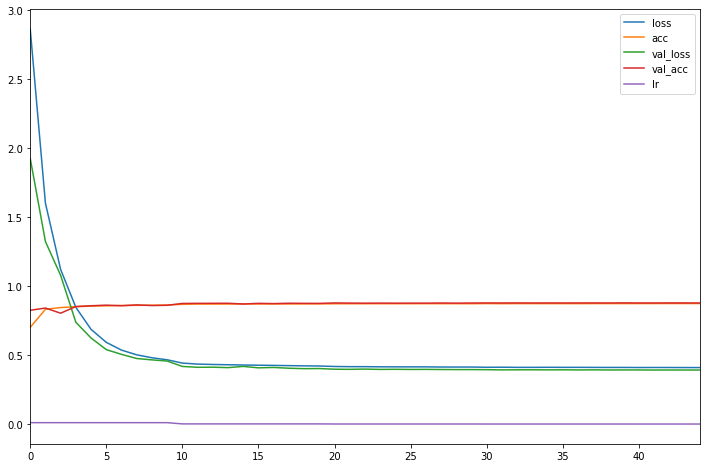

In [8]:
import pandas as pd
pd.DataFrame(his.history).plot(figsize = (12,8))

In [9]:
from tensorflow.keras.models import load_model
clf = load_model('model.h5')

loss, acc = clf.evaluate(train_images, train_labels, verbose=0)
print(f'Training Loss: {loss:.3} \t Training Accuracy: {acc:.3}')

loss, acc = clf.evaluate(val_images, val_labels, verbose=0)
print(f'Validation Loss: {loss:.3} \t Validation Accuracy: {acc:.3}')

loss, acc = clf.evaluate(test_images, test_labels, verbose=0)
print(f'Testing Loss: {loss:.3} \t Testing Accuracy: {acc:.3}')

Training Loss: 0.387 	 Training Accuracy: 0.88
Validation Loss: 0.392 	 Validation Accuracy: 0.879
Testing Loss: 0.397 	 Testing Accuracy: 0.877


In [10]:
json = clf.to_json()
with open('AlphaModel_88%.json', 'w') as json_f:
  json_f.write(json)
  print('Done')
yaml = clf.to_yaml()
with open('AlphaModel_88%.yaml', 'w') as yaml_f:
  yaml_f.write(yaml)
  print('Done')

clf.save_weights('AlphaModel_88_weights.h5')

Done
Done
